# Data Cleaning with Pandas

## Scenario

As data scientists, we want to build a model to predict the sale price of a house in Seattle in 2019, based on its square footage. We know that the King County Department of Assessments has comprehensive data available on real property sales in the Seattle area. We need to prepare the data.

In [1]:
import pandas as pd

### Learning Goals:

- practice cleaning a real dataset
- practice using `py` files and the terminal in conjunction with jupyter notebooks
- run a `py` script through the terminal

### First, get the data!

When working on a project involving data that can fit on our computer, we store it in a `data` directory.

```bash
cd <project_directory>  # example: cd ~/flatiron_ds/pandas-3
mkdir data
cd data
```

Note that `<project_directory>` in angle brackets is a _placeholder_. You should type the path to the actual location on your computer where you're working on this project. Do not literally type `<project_directory>` and _do not type the angle brackets_. You can see an example in the _comment_ to the right of the command above.

In [2]:
!pwd
# i made the data folder in cmd line

/c/Users/Michelle/Documents/DataScience/Flatiron/ClassModules/dc-ds-071519/Module-1/week-2/day-7-pandas-part-3


![terminal](https://media3.giphy.com/media/yR4xZagT71AAM/giphy.gif?cid=790b76115d3620444553533759086a54&rid=giphy.gif)

Now, we'll need to download the two data files that we need. We can do this at the command line:

```bash
wget https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip
wget https://aqua.kingcounty.gov/extranet/assessor/Residential%20Building.zip
```

*Note:* If you do not have the `wget` command yet, you can install it with `brew install wget`, or use `curl <url> -o <filename>`.

Note that `%20` in a URL translates into a space. Even though you will *never put spaces in filenames*, you may need to deal with spaces that _other_ people have used in filenames.

There are two ways to handle the spaces in these filenames when referencing them at the command line.


![internetgif](https://media2.giphy.com/media/QWkuGmMgphvmE/giphy.gif?cid=790b76115d361f42304a6850369f37ea&rid=giphy.gif)

#### 1. You can _escape_ the spaces by putting a backslash (`\`, remember _backslash is next to backspace_) before each one:

`unzip Real\ Property\ Sales.zip`

This is what happens if you tab-complete the filename in the terminal. Tab completion is your friend!

#### 2. You can put the entire filename in quotes:

`unzip "Real Property Sales.zip"`

Try unzipping these files with the `unzip` command. The `unzip` command takes one argument, the name of the file that you want to unzip.

In [3]:
sales_df = pd.read_csv('data\PropertySales.zip')# neat! can only have one file in the folder

C:\Users\Michelle\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# While we wait, we are asked to look for Seattle zip codes
zipcodes = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98112, 98115,\
 98116, 98117, 98118, 98119, 98121, 98122, 98125, 98126, 98133, 98134, 98136,\
 98144, 98146, 98154, 98164, 98174, 98177, 98178, 98195, 98199]

In [5]:
sales_df.dtypes

ExciseTaxNbr           int64
Major                 object
Minor                 object
DocumentDate          object
SalePrice              int64
RecordingNbr          object
Volume                object
Page                  object
PlatNbr               object
PlatType              object
PlatLot               object
PlatBlock             object
SellerName            object
BuyerName             object
PropertyType           int64
PrincipalUse           int64
SaleInstrument         int64
AFForestLand          object
AFCurrentUseLand      object
AFNonProfitUse        object
AFHistoricProperty    object
SaleReason             int64
PropertyClass          int64
SaleWarning           object
dtype: object

### Seeing pink? Warnings are useful!

Note the warning above: `DtypeWarning: Columns (1, 2) have mixed types.` Because we start with an index of zero, the columns that we're being warned about are actually the _second_ and _third_ columns, `sales_df['Major']` and `sales_df['Minor']`.

In [6]:
sales_df.head() # do this with .T to see the columns

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,2687551,138860,110,08/21/2014,245000,20140828001436,,,,,...,3,6,3,N,N,N,N,1,8,
1,1235111,664885,40,07/09/1991,0,199203161090,071,001,664885,C,...,3,0,26,N,N,N,N,18,3,11
2,2704079,423943,50,10/11/2014,0,20141205000558,,,,,...,3,6,15,N,N,N,N,18,8,18 31 51
3,2584094,403700,715,01/04/2013,0,20130110000910,,,,,...,3,6,15,N,N,N,N,11,8,18 31 38
4,1056831,951120,900,04/20/1989,85000,198904260448,117,053,951120,P,...,3,0,2,N,N,N,N,1,9,49


### Data overload?

That's a lot of columns. We're only interested in identifying the date, sale price, and square footage of each specific property. What can we do?

In [7]:
sales_df = sales_df[['Major', 'Minor', 'DocumentDate', 'SalePrice']]# this order is explicitly set here by this order

In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035819 entries, 0 to 2035818
Data columns (total 4 columns):
Major           object
Minor           object
DocumentDate    object
SalePrice       int64
dtypes: int64(1), object(3)
memory usage: 62.1+ MB


In [9]:
bldg_df = pd.read_csv('data/ResidentialBuilding.zip')

C:\Users\Michelle\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
bldg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512827 entries, 0 to 512826
Data columns (total 50 columns):
Major                 512827 non-null int64
Minor                 512827 non-null int64
BldgNbr               512827 non-null int64
NbrLivingUnits        512827 non-null int64
Address               512827 non-null object
BuildingNumber        512827 non-null object
Fraction              512827 non-null object
DirectionPrefix       512246 non-null object
StreetName            512827 non-null object
StreetType            512827 non-null object
DirectionSuffix       512246 non-null object
ZipCode               468452 non-null object
Stories               512827 non-null float64
BldgGrade             512827 non-null int64
BldgGradeVar          512827 non-null int64
SqFt1stFloor          512827 non-null int64
SqFtHalfFloor         512827 non-null int64
SqFt2ndFloor          512827 non-null int64
SqFtUpperFloor        512827 non-null int64
SqFtUnfinFull         512827 non-null int64

### Another warning! Which column has index 11?

In [11]:
bldg_df.columns[11]

'ZipCode'

`ZipCode` seems like a potentially useful column. We'll need it to determine which house sales took place in Seattle.

In [12]:
bldg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512827 entries, 0 to 512826
Data columns (total 50 columns):
Major                 512827 non-null int64
Minor                 512827 non-null int64
BldgNbr               512827 non-null int64
NbrLivingUnits        512827 non-null int64
Address               512827 non-null object
BuildingNumber        512827 non-null object
Fraction              512827 non-null object
DirectionPrefix       512246 non-null object
StreetName            512827 non-null object
StreetType            512827 non-null object
DirectionSuffix       512246 non-null object
ZipCode               468452 non-null object
Stories               512827 non-null float64
BldgGrade             512827 non-null int64
BldgGradeVar          512827 non-null int64
SqFt1stFloor          512827 non-null int64
SqFtHalfFloor         512827 non-null int64
SqFt2ndFloor          512827 non-null int64
SqFtUpperFloor        512827 non-null int64
SqFtUnfinFull         512827 non-null int64

### So many features!

As data scientists, we should be _very_ cautious about discarding potentially useful data. But, today, we're interested in _only_ the total square footage of each property. What can we do?


In [13]:
bldg_df = bldg_df[['Major', 'Minor', 'SqFtTotLiving', 'ZipCode']]

In [14]:
sales_data = pd.merge(sales_df, bldg_df, on=['Major', 'Minor'])
# this actually works now!

In [15]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1407235 entries, 0 to 1407234
Data columns (total 6 columns):
Major            1407235 non-null object
Minor            1407235 non-null object
DocumentDate     1407235 non-null object
SalePrice        1407235 non-null int64
SqFtTotLiving    1407235 non-null int64
ZipCode          1291909 non-null object
dtypes: int64(2), object(4)
memory usage: 75.2+ MB


### Error!

Why are we seeing an error when we try to join the dataframes?

<table>
    <tr>
        <td style="text-align:left"><pre>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013160 entries, 0 to 2013159
Data columns (total 4 columns):
Major           object
Minor           object
DocumentDate    object
SalePrice       int64
dtypes: int64(1), object(3)
memory usage: 61.4+ MB</pre></td>
        <td style="text-align:left"><pre>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511359 entries, 0 to 511358
Data columns (total 4 columns):
Major            511359 non-null int64
Minor            511359 non-null int64
SqFtTotLiving    511359 non-null int64
ZipCode          468345 non-null object
dtypes: int64(3), object(1)
memory usage: 15.6+ MB
</pre></td>
    </tr>
</table>

Review the error message in light of the above:

* `ValueError: You are trying to merge on object and int64 columns.`

### Error!

Note the useful error message above:

`ValueError: Unable to parse string "      " at position 936643`

In this case, we want to treat non-numeric values as missing values. Let's see if there's a way to change how the `pd.to_numeric` function handles errors.

In [16]:
# The single question mark means "show me the docstring"
pd.to_numeric?

Here's the part that we're looking for:
```
errors : {'ignore', 'raise', 'coerce'}, default 'raise'
    - If 'raise', then invalid parsing will raise an exception
    - If 'coerce', then invalid parsing will be set as NaN
    - If 'ignore', then invalid parsing will return the input
```

Let's try setting the `errors` parameter to `'coerce'`.

In [17]:
sales_df['Major'] = pd.to_numeric(sales_df['Major'], errors='coerce')

Did it work?

In [18]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035819 entries, 0 to 2035818
Data columns (total 4 columns):
Major           float64
Minor           object
DocumentDate    object
SalePrice       int64
dtypes: float64(1), int64(1), object(2)
memory usage: 62.1+ MB


It worked! Let's do the same thing with the `Minor` parcel number.

In [19]:
sales_df['Minor'] = pd.to_numeric(sales_df['Minor'], errors='coerce')

In [20]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035819 entries, 0 to 2035818
Data columns (total 4 columns):
Major           float64
Minor           float64
DocumentDate    object
SalePrice       int64
dtypes: float64(2), int64(1), object(1)
memory usage: 62.1+ MB


Now, let's try our join again.

In [21]:
sales_data = pd.merge(sales_df, bldg_df, on=['Major', 'Minor'])

In [22]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453814 entries, 0 to 1453813
Data columns (total 6 columns):
Major            1453814 non-null float64
Minor            1453814 non-null float64
DocumentDate     1453814 non-null object
SalePrice        1453814 non-null int64
SqFtTotLiving    1453814 non-null int64
ZipCode          1334823 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 77.6+ MB


We can see right away that we're missing zip codes for many of the sales transactions. (1321536 non-null entries for ZipCode is fewer than the 1436772 entries in the dataframe.) 

In [23]:
sales_data.loc[sales_data['ZipCode'].isna()].head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode
91,717370.0,350.0,12/01/1997,0,3380,NaN
92,717370.0,350.0,09/13/2004,300000,3380,NaN
93,717370.0,350.0,02/06/2006,901000,3380,NaN
110,277110.0,1923.0,02/08/2007,372500,1000,NaN
111,277110.0,1923.0,02/08/2007,0,1000,NaN


Because we are interested in finding houses in Seattle zip codes, we will need to drop the rows with missing zip codes.

In [24]:
cleaned_data = sales_data.loc[~sales_data['ZipCode'].isna(), :]
len(cleaned_data)

1334823

# Your turn: Data Cleaning with Pandas
![turtletype](https://media3.giphy.com/media/cFdHXXm5GhJsc/giphy.gif?cid=790b76115d3627d8354c7179366b0672&rid=giphy.gif)

### 1. Investigate and drop rows with invalid values in the SalePrice and SqFtTotLiving columns.

Use multiple notebook cells to accomplish this! Press `[esc]` then `B` to create a new cell below the current cell. Press `[return]` to start typing in the new cell.

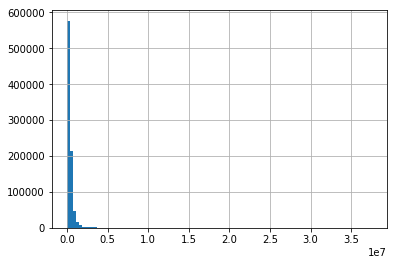

In [25]:
#sorted(sales_data[sales_data.SalePrice>0].SalePrice.unique(),reverse = False)# There are a lot of weird values
# Maybe just do it above 0 for now. But look at the distribution
%matplotlib inline
cleaned_data[cleaned_data.SalePrice>0].SalePrice.hist(bins = 100)

In [26]:
cleaned_data = cleaned_data.loc[sales_data['SalePrice']>0, :]
cleaned_data.SalePrice.describe()

count    8.762540e+05
mean     4.347818e+05
std      8.861641e+05
min      1.000000e+00
25%      1.650000e+05
50%      2.790000e+05
75%      4.582000e+05
max      3.750000e+07
Name: SalePrice, dtype: float64

In [27]:
sorted(cleaned_data.SalePrice.unique(),reverse = True)[:10]

[37500000,
 31200000,
 30000000,
 27920653,
 26797000,
 26750000,
 24500000,
 23250000,
 22000000,
 21840000]

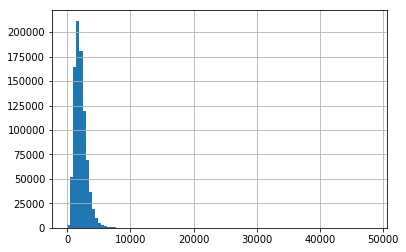

In [28]:
cleaned_data[cleaned_data.SqFtTotLiving>0].SqFtTotLiving.hist(bins = 100)

In [29]:
cleaned_data = cleaned_data.loc[cleaned_data['SqFtTotLiving']>0, :]
cleaned_data.SqFtTotLiving.describe()

count    876246.000000
mean       2105.204892
std         949.603396
min           1.000000
25%        1450.000000
50%        1950.000000
75%        2570.000000
max       48160.000000
Name: SqFtTotLiving, dtype: float64

In [30]:
len(cleaned_data)

876246

In [31]:
sorted(cleaned_data.SqFtTotLiving.unique(),reverse = False)[:10]

[1, 2, 3, 70, 100, 120, 140, 160, 170, 180]

In [32]:
# Are these weird values correlated?
cleaned_data[cleaned_data.SqFtTotLiving==1]

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode
922289,560600.0,350.0,03/06/1989,220000,1,98105
922291,560600.0,350.0,04/28/2010,750000,1,98105


### 2. Investigate and handle non-numeric ZipCode values

Can you find a way to shorten ZIP+4 codes to the first five digits?

What's the right thing to do with missing values?

In [33]:
# Read the error message and decide how to fix it.
# Note: using errors='coerce' is the *wrong* choice in this case.
def is_integer(x):
    try:
        _ = int(x)
    except ValueError:
        return False
    return True

cleaned_data.loc[cleaned_data['ZipCode'].apply(is_integer) == False, 'ZipCode'].head()

13522    98031-3173
13842    98042-3001
13843    98042-3001
13844    98042-3001
13845    98042-3001
Name: ZipCode, dtype: object

In [34]:
len(cleaned_data)

876246

In [35]:
cleaned_data['ZipCode'] = cleaned_data['ZipCode'].map(str)# is this working?
cleaned_data.ZipCode.map(type).unique()#yes

array([<class 'str'>], dtype=object)

In [36]:
cleaned_data['ZipCode'].map(len).unique()

array([ 5,  7, 10,  4,  1,  8,  2,  9], dtype=int64)

In [37]:
cleaned_data['ZipCode'] = cleaned_data['ZipCode'].map(lambda x: x[:5])

In [38]:
cleaned_data['ZipCode'].map(len).unique()
# remove shorter zip codes? how?

array([5, 4, 1, 2], dtype=int64)

In [39]:
len(cleaned_data)

876246

### 3. Add a column for PricePerSqFt



In [40]:
cleaned_data['PricePerSqFt'] = cleaned_data.SalePrice/cleaned_data.SqFtTotLiving

### 4. Subset the data to 2019 sales only.

We can assume that the DocumentDate is approximately the sale date.

In [41]:
cleaned_data2019 = cleaned_data[cleaned_data['DocumentDate'].map(lambda x: '2019' in x)]

In [42]:
len(cleaned_data2019)

12642

### 5. Subset the data to zip codes within the City of Seattle.

You'll need to find a list of Seattle zip codes!

In [43]:
seattle_zips = pd.DataFrame(zipcodes,columns = ['ZipCode'])
seattle_zips

,ZipCode
0,98101
1,98102
2,98103
3,98104
4,98105
5,98106
6,98107
7,98108
8,98109
9,98112


In [44]:
# seattle_property = cleaned_data2019.merge(seattle_zips,on='ZipCode',how = 'inner')
# this isn't working because you are trying to merge on two different data types

In [45]:
cleaned_data2019.ZipCode.map(type).unique()

array([<class 'str'>], dtype=object)

In [46]:
seattle_zips.ZipCode.map(type).unique()

array([<class 'int'>], dtype=object)

In [47]:
seattle_zips = seattle_zips.astype(str)
seattle_zips.info()
#cleaned_data2019.ZipCode.map(type)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 1 columns):
ZipCode    31 non-null object
dtypes: object(1)
memory usage: 328.0+ bytes


In [48]:
seattle_property = cleaned_data2019.merge(seattle_zips,on='ZipCode',how = 'inner')

In [49]:
seattle_property.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4319 entries, 0 to 4318
Data columns (total 7 columns):
Major            4319 non-null float64
Minor            4319 non-null float64
DocumentDate     4319 non-null object
SalePrice        4319 non-null int64
SqFtTotLiving    4319 non-null int64
ZipCode          4319 non-null object
PricePerSqFt     4319 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 269.9+ KB


In [50]:
seattle_property

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode,PricePerSqFt
0,327480.0,560.0,01/18/2019,108560,890,98144,121.977528
1,367890.0,30.0,03/13/2019,923000,2550,98144,361.960784
2,765910.0,33.0,05/21/2019,640000,1300,98144,492.307692
3,872810.0,750.0,05/08/2019,768000,1440,98144,533.333333
4,754830.0,320.0,04/28/2019,490000,1038,98144,472.061657
5,983420.0,995.0,03/13/2019,667000,1070,98144,623.364486
6,159660.0,50.0,04/29/2019,610000,2380,98144,256.302521
7,570000.0,1660.0,03/19/2019,1265000,2890,98144,437.716263
8,937930.0,55.0,06/14/2019,810000,1790,98144,452.513966
9,605860.0,285.0,07/02/2019,665000,1320,98144,503.787879


### 6. What is the mean price per square foot for a house sold in Seattle in 2019?

Don't just type the answer. Type code that generates the answer as output!

In [51]:
seattle_property.PricePerSqFt.mean()

520.2328898928023

## Turning code into a script

#### make a new .py file
- open a new `.py` file _or_ open a new jupyter notbook and export as a `.py` file so we can start to edit the `.py` file directly
- save the file as `mean_ppsf_seattle.py`
- look at all your code between `sales_df = pd.read_csv('data/Real Property Sales.zip')` and question `number 6` above

#### review & organize your code
- _organize_ your code in the `mean_ppsf_seattle.py` to start with `sales_df = pd.read_csv('data/Real Property Sales.zip')` and end with printing out the mean price per square foot for a house sold in seattle in 2019
- the code should be able to run without throwing any errors
- remember to include `import pandas as pd` and any other necessary statements at the start of your script

#### test your script
- go to the terminal
- make sure you are in the same directory path as your jupyter notebook and the `.py` file
- in the terminal type and then run `python mean_ppsf_seattle.py`
- confirm the script returns in terminal what you wanted it to return

#### send your script to Ammar and Marisa

![anykey](https://media2.giphy.com/media/26BGIqWh2R1fi6JDa/giphy.gif?cid=790b76115d3627d8354c7179366b0672&rid=giphy.gif)